In [201]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC, SVR, LinearSVR
from sklearn.datasets import make_moons

In [92]:
iris = datasets.load_iris()

In [93]:
X = iris['data'][iris['target'] != 0, 2:]
y = (iris['target'][iris['target'] != 0] == 2).astype(int)

In [94]:
scaler = StandardScaler()

In [146]:
svc_clf = LinearSVC(C=1, loss='hinge', random_state=42, max_iter=10000)

In [147]:
pipeline = Pipeline([
    ('std_scaler', scaler),
    ('svc', svc_clf)
])

In [148]:
pipeline.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svc',
                 LinearSVC(C=1, loss='hinge', max_iter=10000,
                           random_state=42))])

In [149]:
pipeline.predict([[5.5,1.7]])

array([1])

In [127]:
def plot_decision_boundary(clf, min_x, max_x):
    #w0 x0 + w1 x1 + b = 0 at the decision boundary
    w = clf.coef_[0]
    b = clf.intercept_[0]
    x0 = np.linspace(min_x, max_x, 200)
    x1 = -w[0]/w[1] * x0 - b/w[1]
    plt.plot(x0, x1, 'k--')

In [128]:
svc_clf.coef_, svc_clf.intercept_

(array([[0.05027621, 2.67464838]]), array([-4.68614735]))

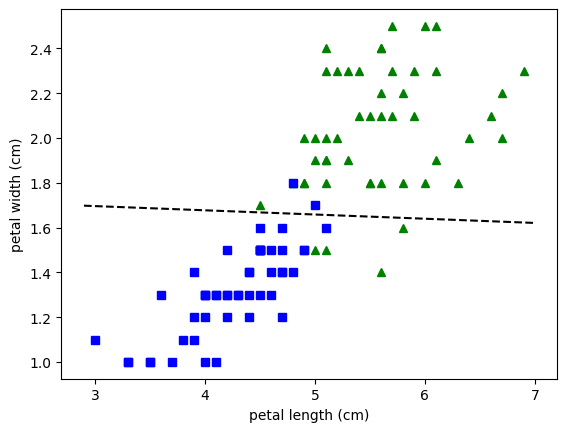

In [129]:
plt.plot(X[y==1,0], X[y==1,1], 'g^')
plt.plot(X[y==0,0], X[y==0,1], 'bs')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plot_decision_boundary(svc_clf , 2.9,7)
plt.show()

In [151]:
cross_val_score(svc_clf, X, y, cv=10, scoring='accuracy')

array([1. , 1. , 1. , 0.9, 0.9, 0.8, 0.8, 1. , 1. , 1. ])

In [166]:
X,y = make_moons(n_samples=1000, noise=0.1, random_state=42)

In [167]:
poly_pipeline_svc = Pipeline([
    ('poly_feat', PolynomialFeatures(degree=3)),
    ('std_scaler', StandardScaler()),
    ('svc', LinearSVC(loss='hinge', C=10, random_state=42, max_iter=100000))
])

poly_pipeline_svc.fit(X, y)

Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('svc',
                 LinearSVC(C=10, loss='hinge', max_iter=100000,
                           random_state=42))])

In [168]:
cross_val_score(poly_pipeline_svc, X, y, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

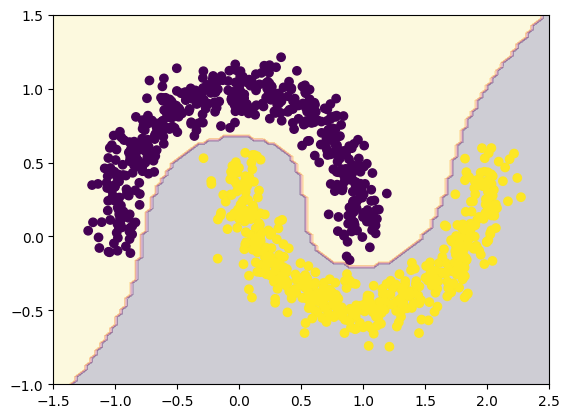

In [184]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.inferno_r, alpha=0.2)

plot_predictions(poly_pipeline_svc, [-1.5, 2.5, -1, 1.5])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [198]:
poly_kernel_svc = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svc.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm', SVC(C=5, coef0=1, kernel='poly'))])

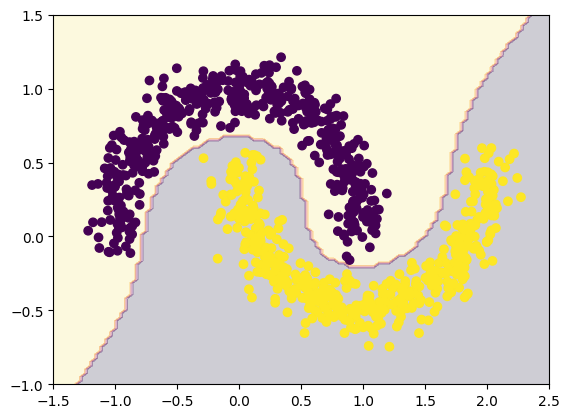

In [199]:
plot_predictions(poly_kernel_svc, [-1.5, 2.5, -1, 1.5])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

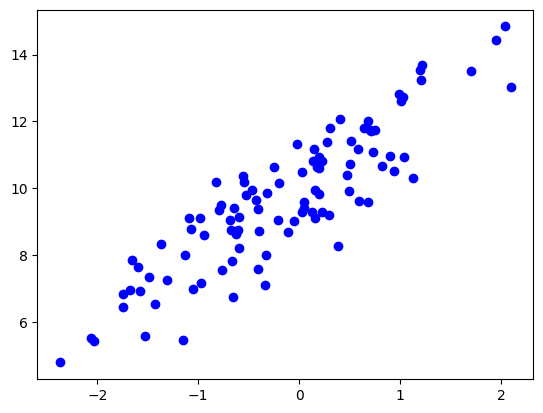

In [333]:
m = 100
X = np.random.randn(m,1)
y =  (2 * X + 10 + np.random.randn(m,1)).ravel()

plt.plot(X, y, 'bo')
plt.show()

In [334]:
scaler.fit(X.reshape(-1,1), y)

StandardScaler()

In [335]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42, max_iter=10000)
svm_reg.fit(X.reshape(-1,1), y)

LinearSVR(epsilon=1.5, max_iter=10000, random_state=42)

In [336]:
y_pred = svm_reg.predict(X.reshape(-1,1))

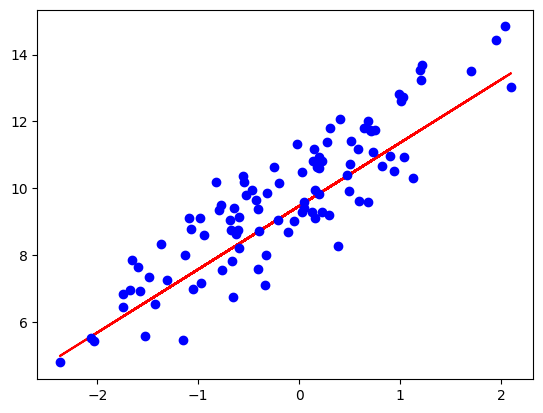

In [337]:
plt.plot(X, y_pred, 'r-')
plt.plot(X.ravel(), y, 'bo')
plt.show()